In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pickle
from collections import defaultdict

#### Compare performance across experiments

In [98]:
BASE_DIR = Path(os.getcwd())
def get_losses(exp_name):
    EXP_PATH = os.path.join(BASE_DIR, 'experiments', exp_name)
    loss_dict = pickle.load(open(os.path.join(EXP_PATH, 'loss.pkl'), 'rb'))
    losses = [v for k,v in loss_dict.items()]
    losses = sum(losses, [])
    return losses

In [121]:
def plot_loss_multiple(exp_list):
    # Training loss
    fig = plt.figure(figsize=(10,6))
    plt.xlabel('iterations', fontsize=14)
    plt.ylabel('loss', fontsize=14)
    plt.grid(linestyle='--')
    for exp_name in exp_list:
        losses = get_losses(exp_name)
        plt.plot([x for x in range(0,len(losses))], losses, label = exp_name)
    plt.legend()
    plt.show()

In [122]:
def plot_val_multiple(exp_list):
    # Validation metrics
    f, ax = plt.subplots(2,2,figsize = (12,12))
    ax = ax.flatten()
    eval_every = 2

    for exp_name in exp_list:
        EXP_PATH = os.path.join(BASE_DIR, 'experiments', exp_name)
        eval_dict = pickle.load(open(os.path.join(EXP_PATH, 'eval.pkl'), 'rb'))
        metrics = defaultdict(list)
        for k,v in eval_dict.items():
            for key,val in v.items():
                metrics[key].append(sum(val)/len(val))

        for i, k in enumerate(metrics.keys()):
            ax[i].plot([x for x in range(0,len(metrics[k])*eval_every,eval_every)], metrics[k], label = 'exp_name')
            ax[i].set_xlabel('epochs', fontsize=14)
            ax[i].set_ylabel(k, fontsize=14)
            ax[i].grid(linestyle='--')
            ax[i].legend()
    plt.show()

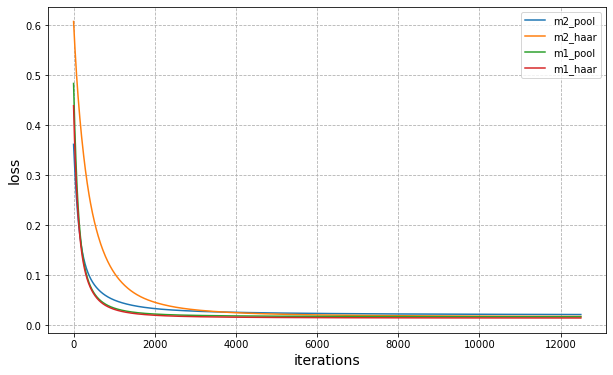

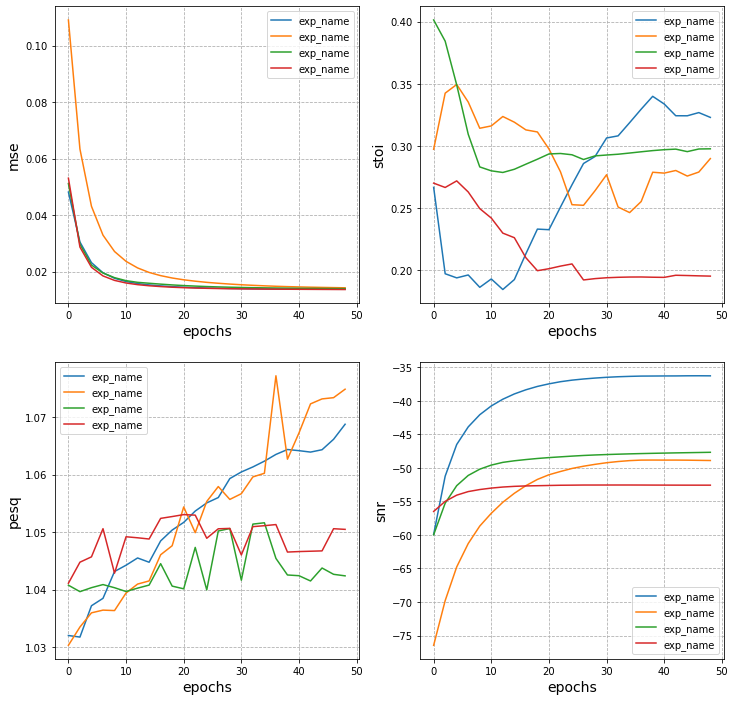

In [124]:
exp_list = ['m2_pool', 'm2_haar', 'm1_pool', 'm1_haar']
plot_loss_multiple(exp_list)
plot_val_multiple(exp_list)

#### Plot experiment specific curves

In [77]:
exp_name = 'm2_pool'
BASE_DIR = Path(os.getcwd())
EXP_PATH = os.path.join(BASE_DIR, 'experiments', exp_name)

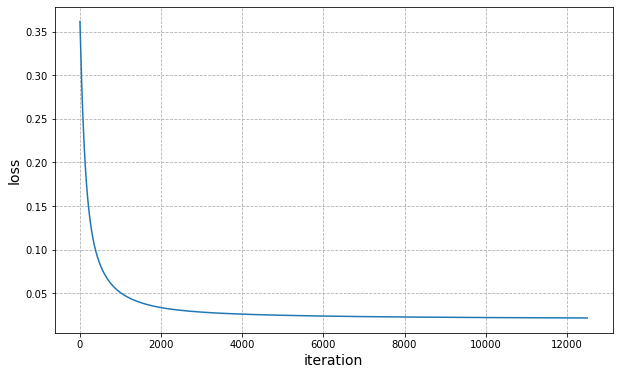

In [108]:
loss_dict = pickle.load(open(os.path.join(EXP_PATH, 'loss.pkl'), 'rb'))
losses = [v for k,v in loss_dict.items()]
losses = sum(losses, [])
fig = plt.figure(figsize=(10,6))
plt.plot([x for x in range(0,len(losses))], losses)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.grid(linestyle='--')
plt.show()

In [74]:
eval_dict = pickle.load(open(os.path.join(EXP_PATH, 'eval.pkl'), 'rb'))

In [75]:
metrics = defaultdict(list)
for k,v in eval_dict.items():
    for key,val in v.items():
        metrics[key].append(sum(val)/len(val))

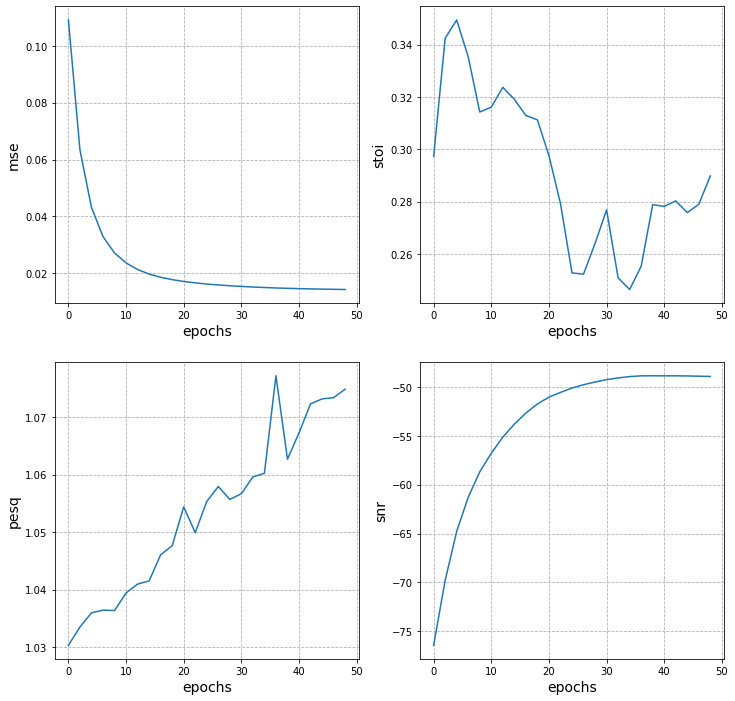

In [116]:
f, ax = plt.subplots(2,2,figsize = (12,12))
ax = ax.flatten()
eval_every = 2
for i, k in enumerate(metrics.keys()):
    ax[i].plot([x for x in range(0,len(metrics[k])*eval_every,eval_every)], metrics[k])
    ax[i].set_xlabel('epochs', fontsize=14)
    ax[i].set_ylabel(k, fontsize=14)
    ax[i].grid(linestyle='--')
plt.show()